# 画像処理

[WRN(Wide Residual Network)](https://arxiv.org/pdf/1605.07146.pdf)を使用して、10種類のオブジェクトのうちの1つが撮像された複数の画像をオブジェクトごとに分類する。

In [36]:
import numpy as np

from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [7]:
random_state = 42

In [8]:
(cifar_X_1, cifar_y_1), (cifar_X_2, cifar_y_2) = cifar10.load_data()

cifar_X = np.r_[cifar_X_1, cifar_X_2]
cifar_y = np.r_[cifar_y_1, cifar_y_2]

cifar_X = cifar_X.astype('float32') / 255
cifar_y = np.eye(10)[cifar_y.astype('int32').flatten()]

train_X, test_X, train_y, test_y = train_test_split(cifar_X, cifar_y,
                                                    test_size=10000,
                                                    random_state=42)

170393600/170498071 [============================>.] - ETA: 0s

In [20]:
labels = ['airplane',
          'automobile',
          'bird',
          'cat',
          'deer',
          'dog',
          'frog',
          'horse',
          'ship',
          'truck'] 

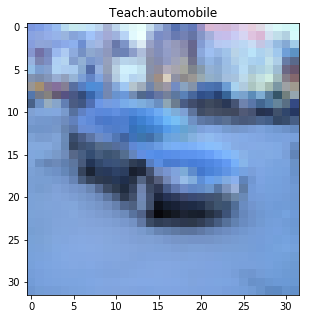

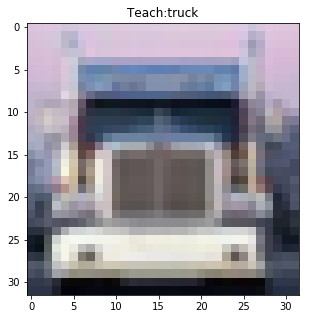

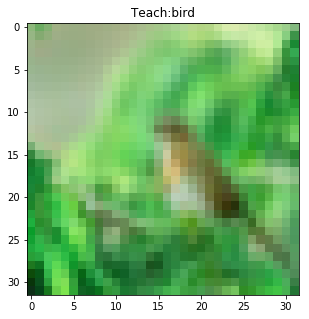

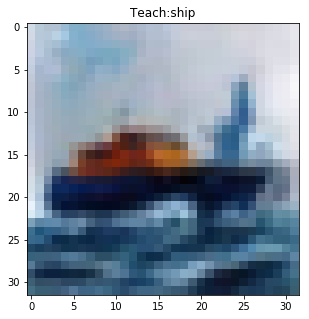

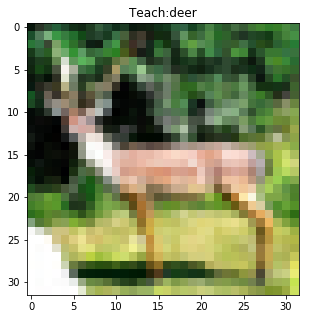

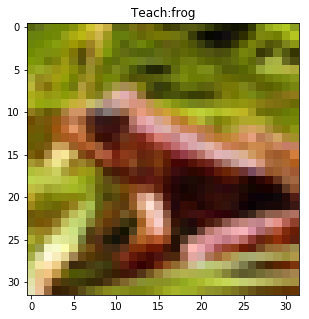

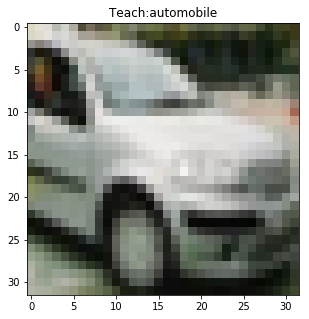

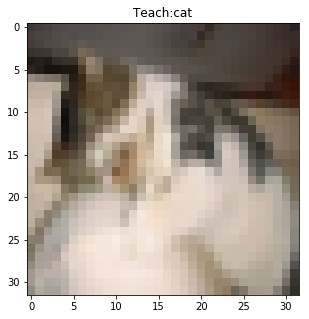

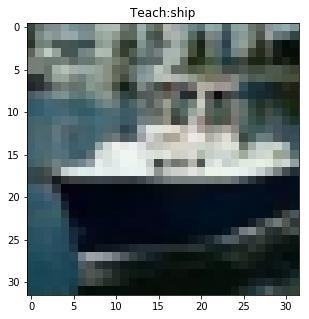

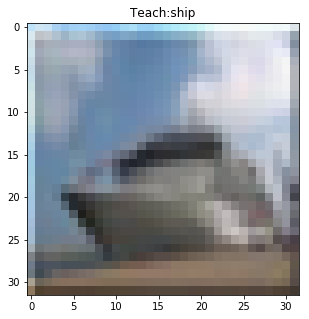

In [28]:
import matplotlib.pyplot as plt

for i in range(10):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)
    ax.set_title("Teach:{0}".format(labels[test_y[i].argmax()]))
    ax.imshow(test_X[i])
    plt.show()

In [9]:
from sklearn.model_selection import train_test_split

import keras
from keras.layers import Input, Flatten, Activation, BatchNormalization
from keras.layers import Dense, Conv2D, AveragePooling2D
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator

In [10]:
num_classes = 10
epochs = 16

train_X, valid_X, train_y, valid_y = train_test_split(train_X,
                                                      train_y,
                                                      test_size=1000,
                                                      random_state=42)

In [37]:
inputs = Input(shape=train_X.shape[1:])

x = Conv2D(filters=16,
           kernel_size=(3, 3),
           strides=(1, 1),
           padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x_branch = Conv2D(filters=32,
                  kernel_size=(1, 1),
                  strides=(1,1),
                  padding='same')(x)

x = Conv2D(filters=32,
           kernel_size=(3, 3),
           strides=(1,1),
           padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x_tmp = Conv2D(filters=32,
           kernel_size=(3, 3),
           strides=(1,1),
           padding='same')(x)

x = keras.layers.concatenate([x_tmp, x_branch])
x_branch = keras.layers.concatenate([x_tmp, x_branch])

x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=32,
           kernel_size=(3, 3),
           strides=(1,1),
           padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=32,
           kernel_size=(3, 3),
           strides=(1,1),
           padding='same')(x)

x = keras.layers.concatenate([x, x_branch])

x = BatchNormalization()(x)
x = Activation('relu')(x)

x_branch = Conv2D(filters=64,
                  kernel_size=(1, 1),
                  strides=(2,2),
                  padding='same')(x)

x = Conv2D(filters=64,
           kernel_size=(3, 3),
           strides=(2,2),
           padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x_tmp = Conv2D(filters=64,
           kernel_size=(3, 3),
           strides=(1,1),
           padding='same')(x)

x = keras.layers.concatenate([x_tmp, x_branch])
x_branch = keras.layers.concatenate([x_tmp, x_branch])

x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64,
           kernel_size=(3, 3),
           strides=(1,1),
           padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=64,
           kernel_size=(3, 3),
           strides=(1,1),
           padding='same')(x)

x = keras.layers.concatenate([x, x_branch])

x = BatchNormalization()(x)
x = Activation('relu')(x)

x_branch = Conv2D(filters=128,
                  kernel_size=(1, 1),
                  strides=(2,2),
                  padding='same')(x)

x = Conv2D(filters=128,
           kernel_size=(3, 3),
           strides=(2,2),
           padding='same')(x)

x = BatchNormalization()(x)
x = Activation('relu')(x)

x_tmp = Conv2D(filters=128,
           kernel_size=(3, 3),
           strides=(1,1),
           padding='same')(x)

x = keras.layers.concatenate([x_tmp, x_branch])
x_branch = keras.layers.concatenate([x_tmp, x_branch])

x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128,
           kernel_size=(3, 3),
           strides=(1,1),
           padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Conv2D(filters=128,
           kernel_size=(3, 3),
           strides=(1,1),
           padding='same')(x)

x = keras.layers.concatenate([x, x_branch])

x = BatchNormalization()(x)
x = Activation('relu')(x)    

x = AveragePooling2D(pool_size=(8, 8))(x)     

x = Flatten()(x)
x = Dense(num_classes)(x)
outputs = Activation('softmax')(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

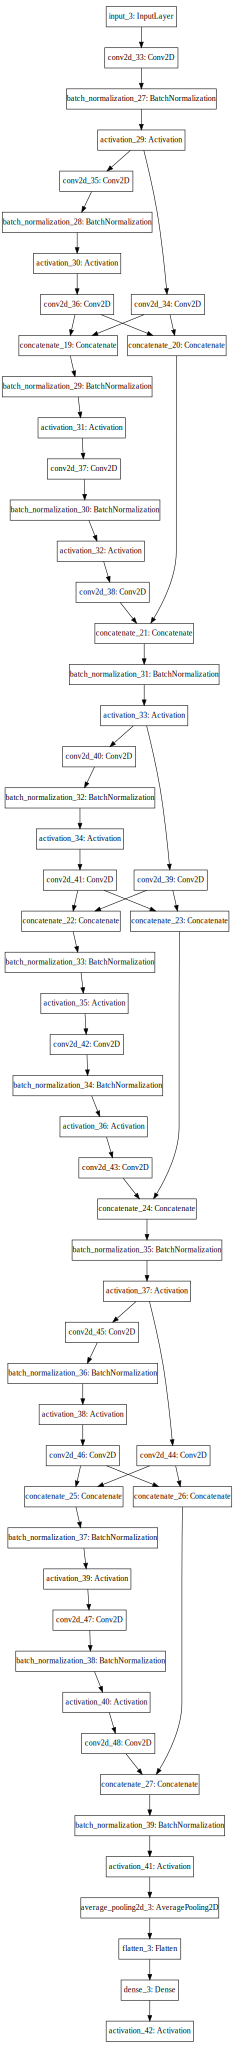

In [38]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [4]:
datagen = ImageDataGenerator(featurewise_center=False,  # set input mean to 0 over the dataset
                             samplewise_center=False,  # set each sample mean to 0
                             featurewise_std_normalization=False,  # divide inputs by std of the dataset
                             samplewise_std_normalization=False,  # divide each input by its std
                             zca_whitening=False,  # apply ZCA whitening
                             rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
                             width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                             height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                             horizontal_flip=True,  # randomly flip images
                             vertical_flip=False)  # randomly flip images

datagen.fit(train_X)

model.fit_generator(datagen.flow(train_X,
                                 train_y,
                                 batch_size=32),
                    steps_per_epoch=train_X.shape[0] // 32,
                    epochs=epochs,
                    validation_data=(valid_X, valid_y),
                    workers=64,
                    max_queue_size=128,
                    use_multiprocessing=True)

Epoch 1/16
1531/1531 [==============================] - 204s 133ms/step - loss: 1.2523 - acc: 0.5468 - val_loss: 1.3502 - val_acc: 0.5600
Epoch 2/16
1531/1531 [==============================] - 198s 129ms/step - loss: 0.8495 - acc: 0.6988 - val_loss: 0.8582 - val_acc: 0.6990
Epoch 3/16
1531/1531 [==============================] - 198s 129ms/step - loss: 0.6769 - acc: 0.7652 - val_loss: 0.7645 - val_acc: 0.7380
Epoch 4/16
1531/1531 [==============================] - 198s 129ms/step - loss: 0.5834 - acc: 0.7990 - val_loss: 0.9134 - val_acc: 0.7160
Epoch 5/16
1531/1531 [==============================] - 198s 130ms/step - loss: 0.5187 - acc: 0.8211 - val_loss: 0.9412 - val_acc: 0.6980
Epoch 6/16
1531/1531 [==============================] - 198s 129ms/step - loss: 0.4640 - acc: 0.8398 - val_loss: 0.6070 - val_acc: 0.8090
Epoch 7/16
1531/1531 [==============================] - 198s 129ms/step - loss: 0.4264 - acc: 0.8531 - val_loss: 0.5182 - val_acc: 0.8320
Epoch 8/16
1531/1531 [============

In [15]:
import pickle

with open('pred_y.dump', 'rb') as f:
    pred_y = pickle.load(f)

In [16]:
print(f1_score(np.argmax(test_y, 1), pred_y, average='macro'))

0.863590978032


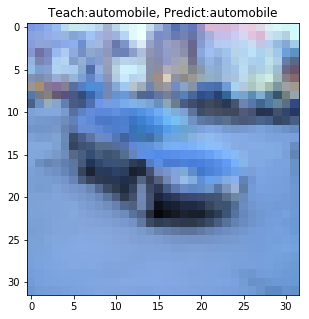

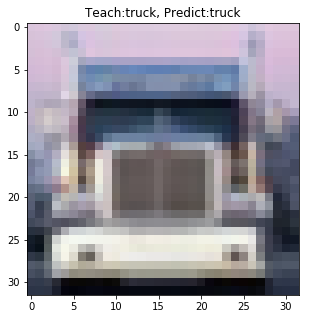

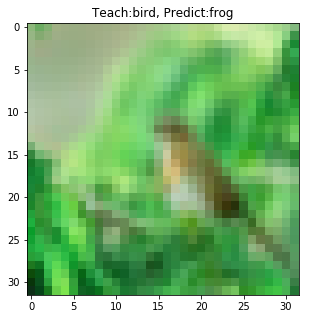

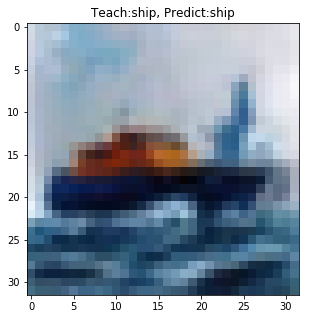

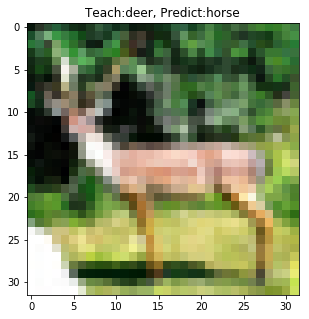

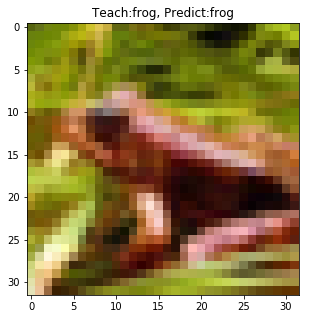

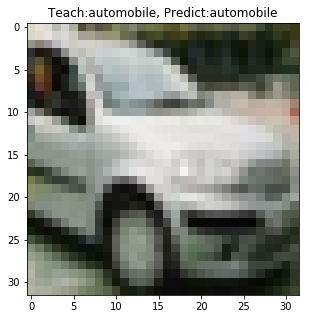

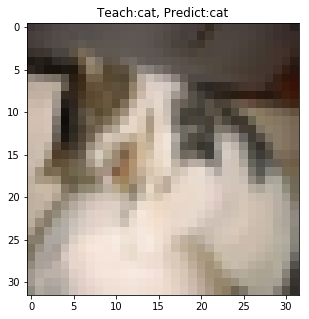

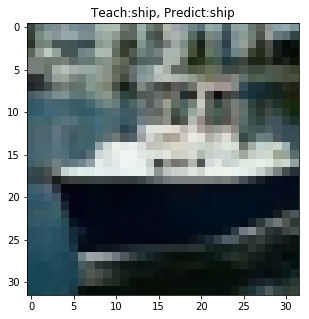

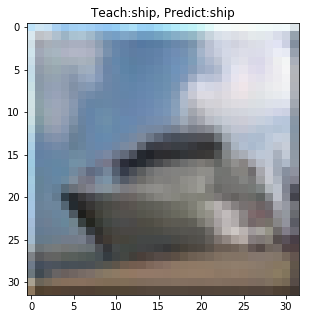

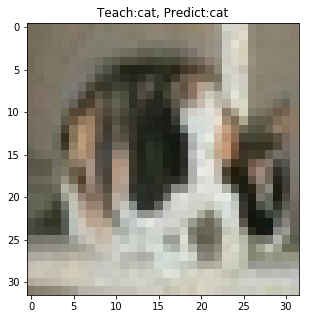

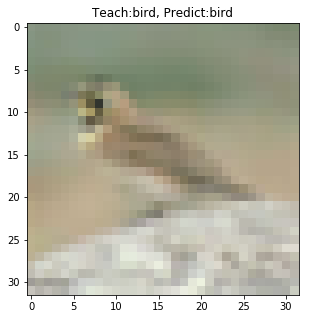

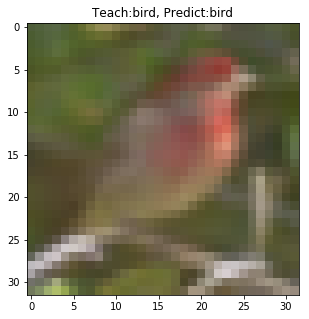

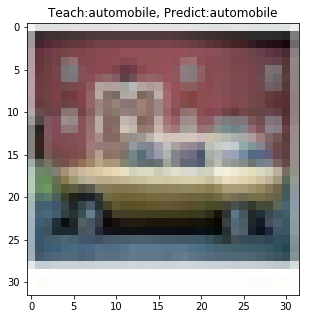

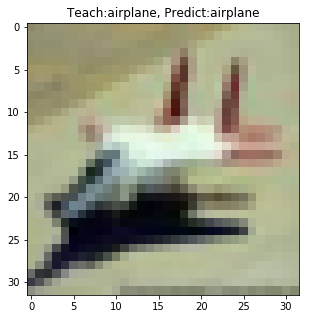

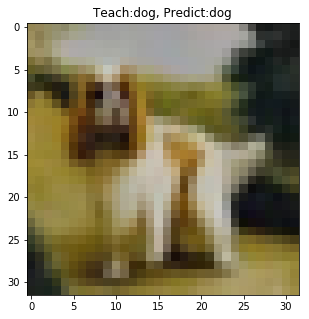

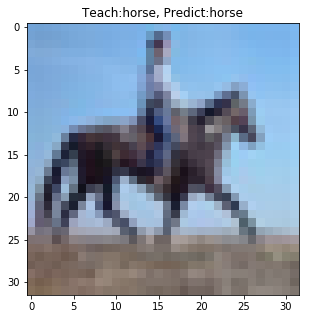

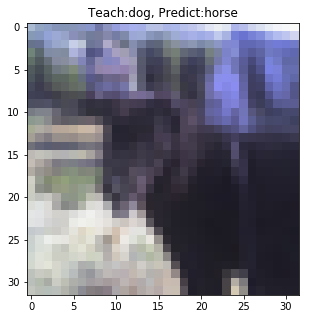

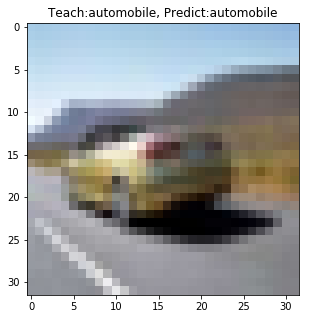

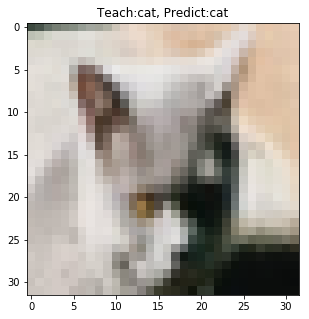

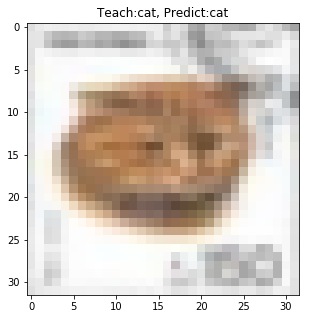

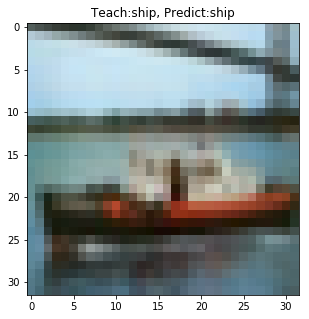

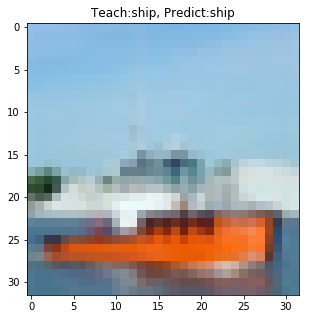

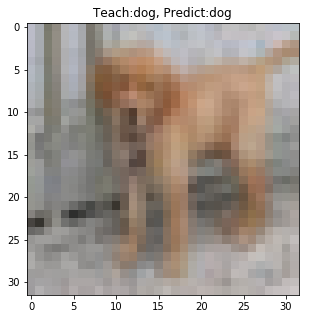

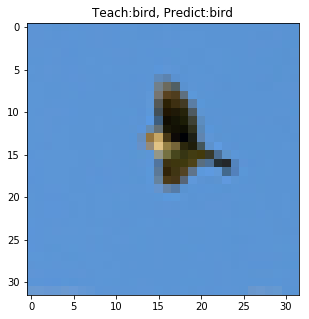

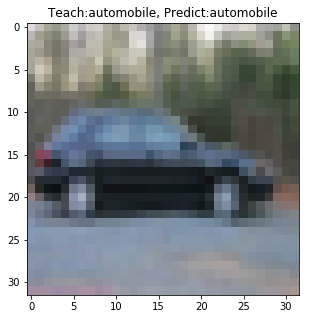

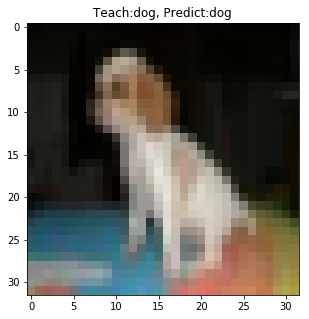

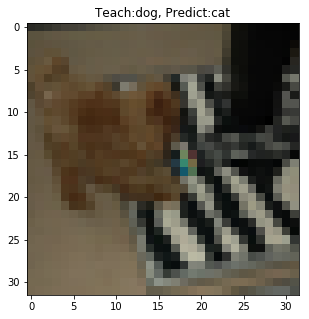

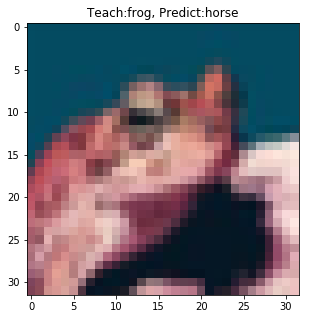

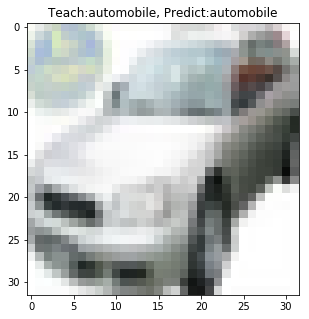

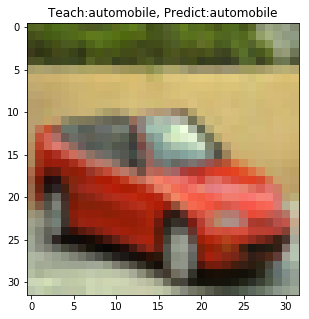

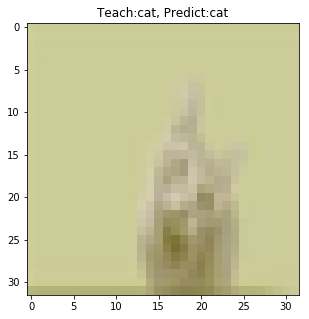

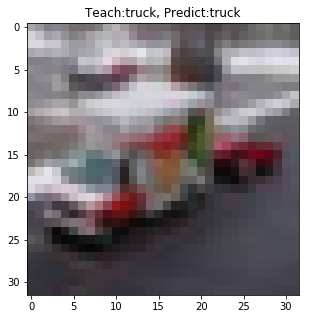

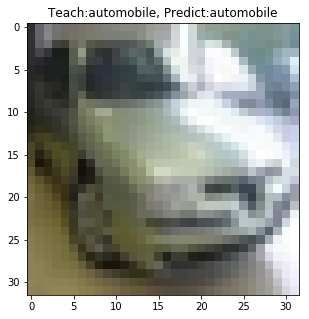

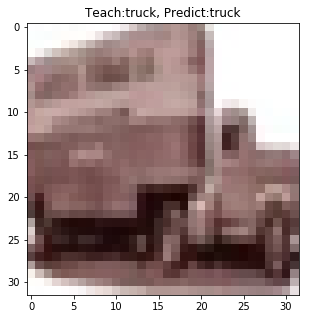

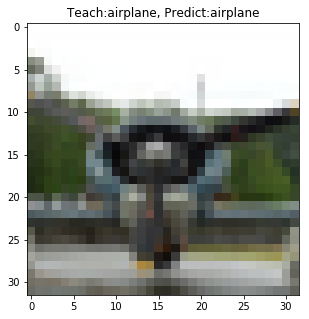

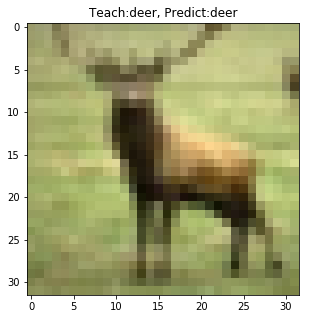

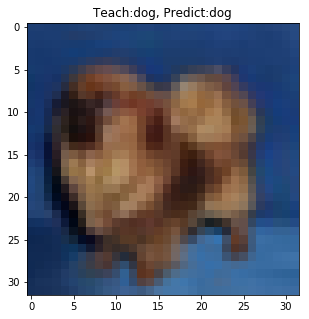

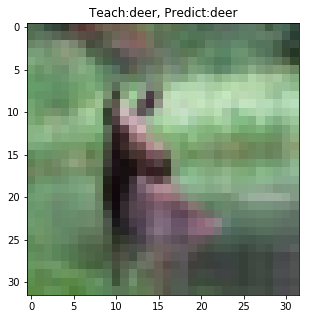

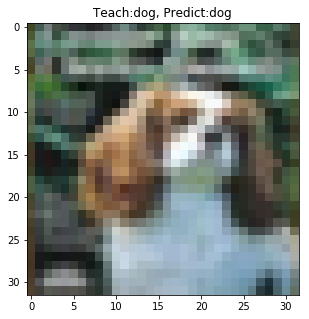

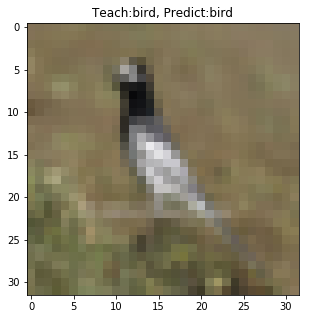

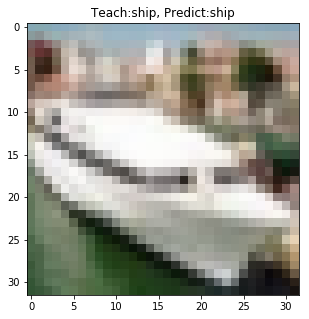

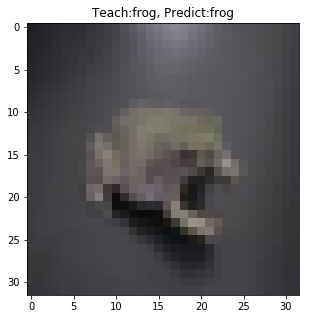

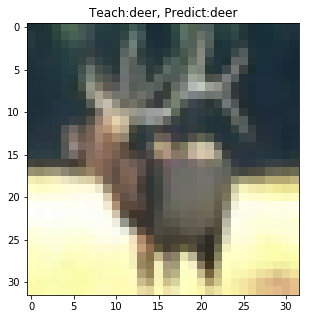

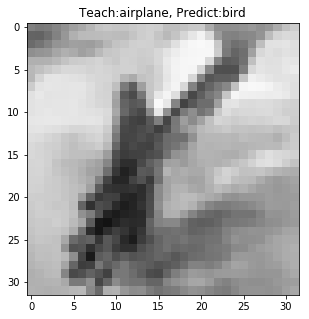

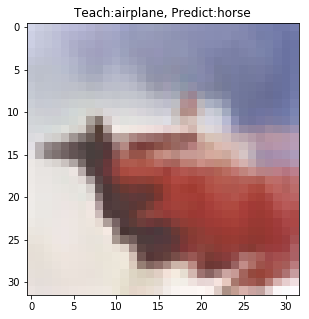

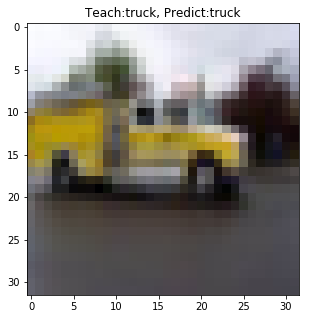

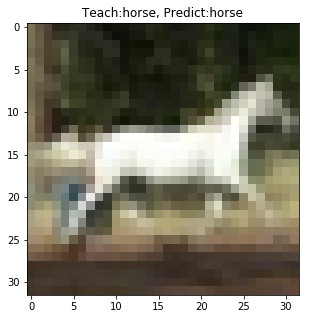

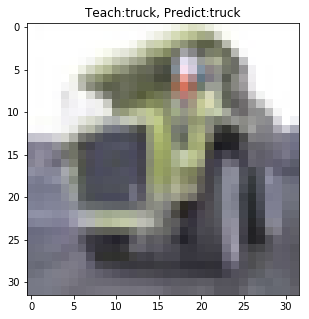

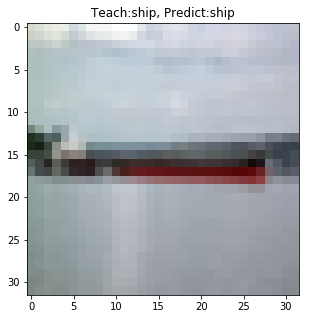

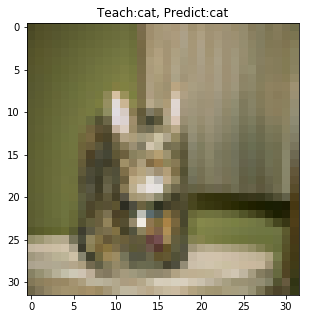

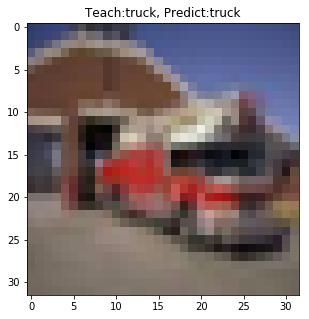

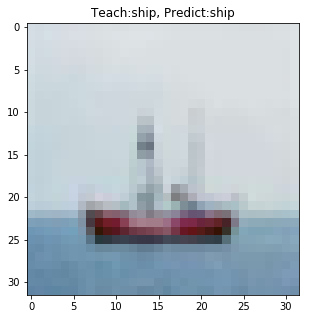

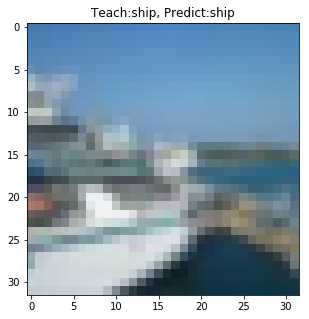

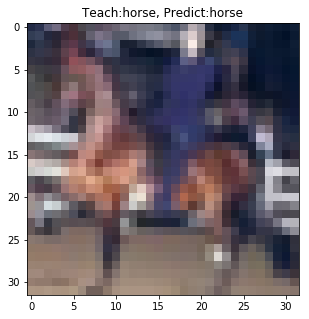

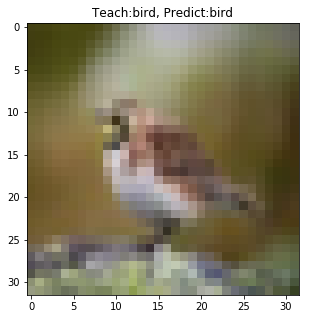

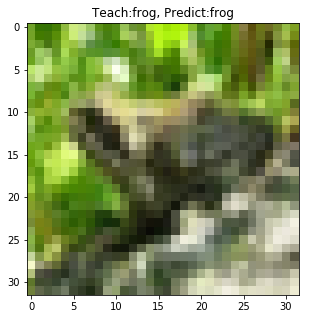

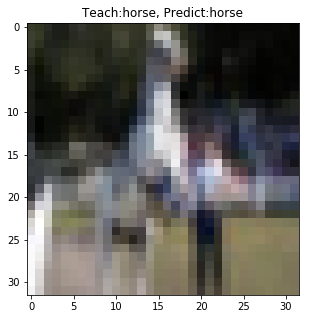

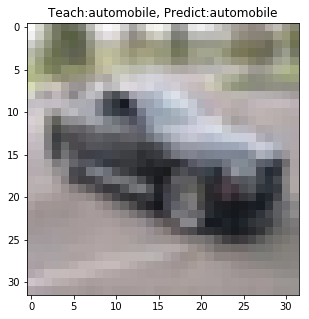

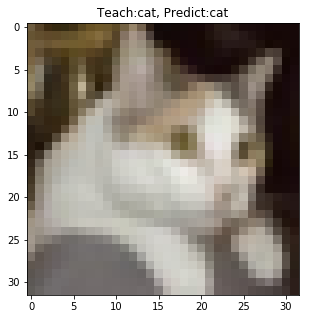

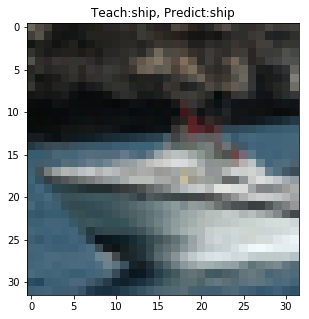

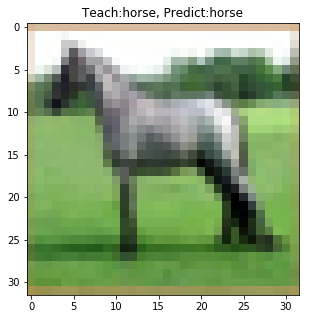

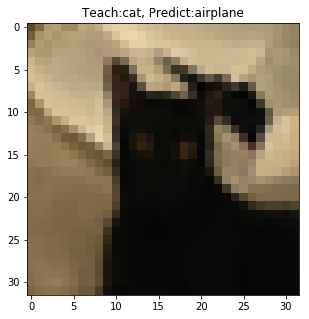

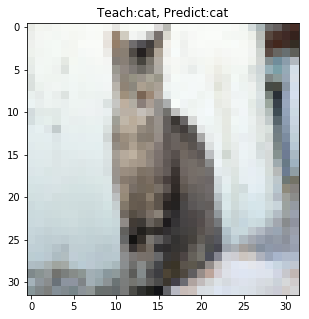

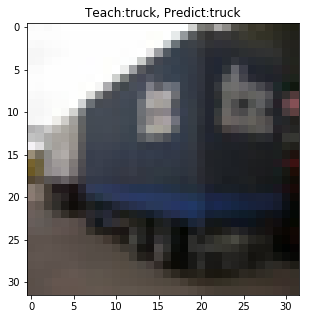

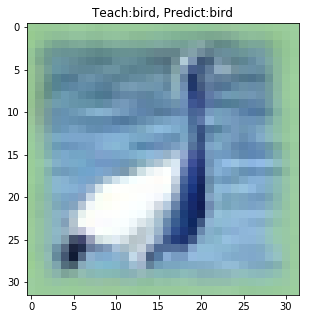

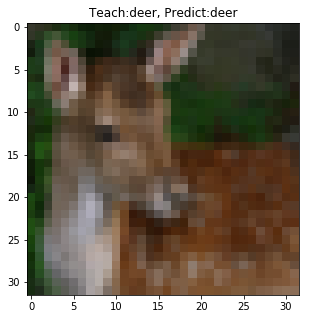

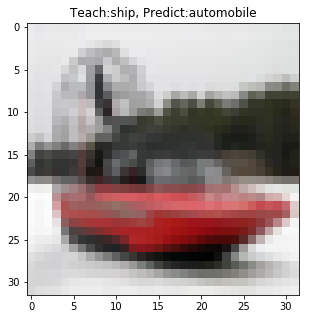

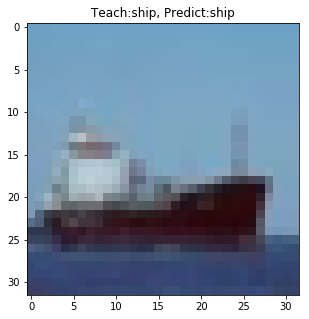

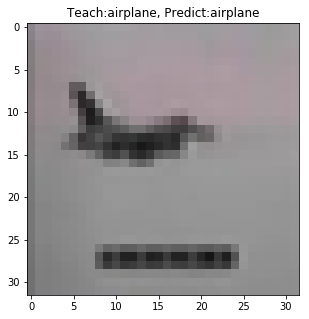

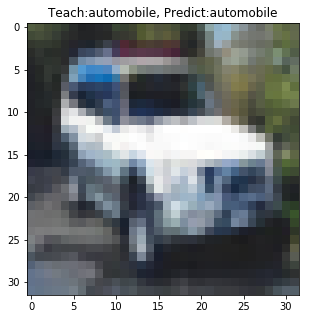

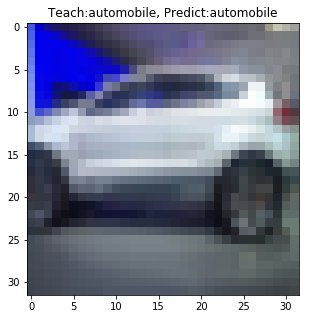

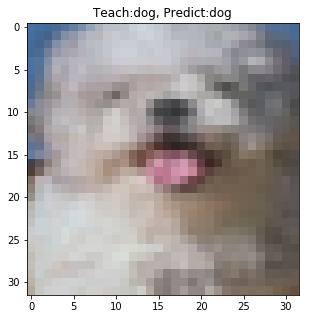

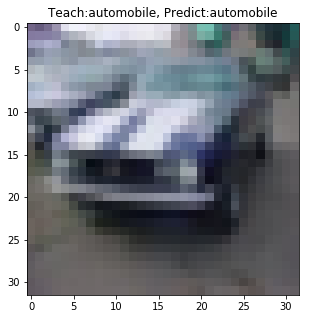

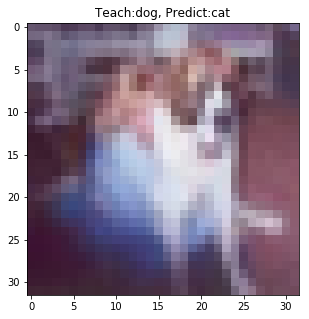

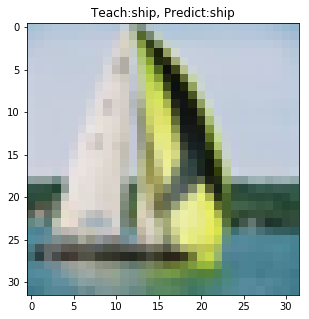

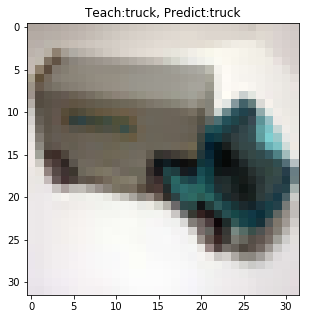

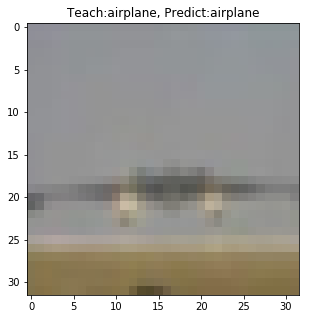

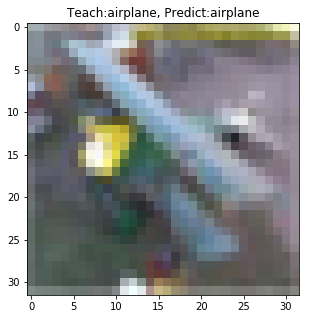

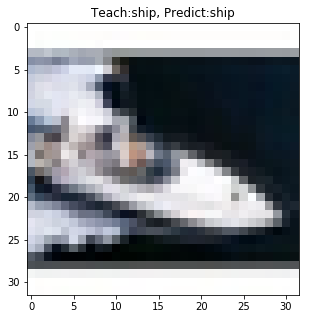

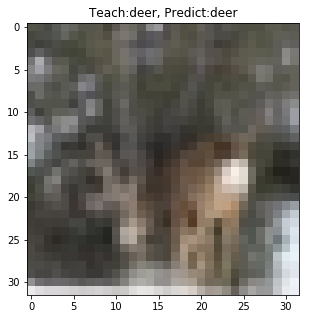

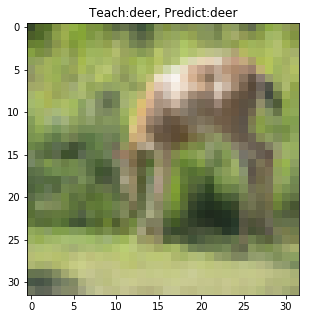

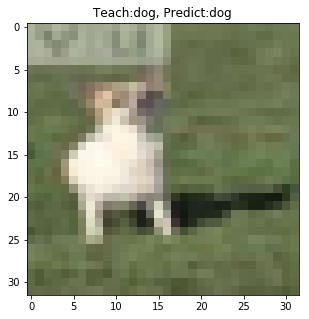

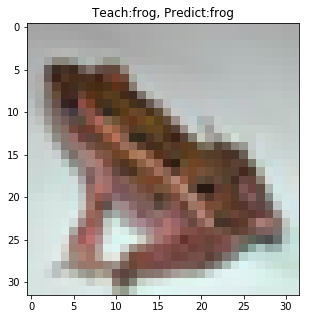

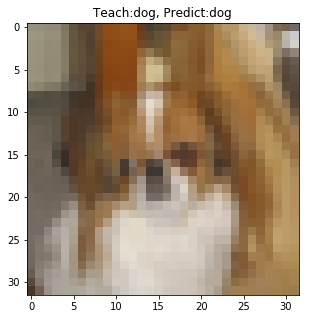

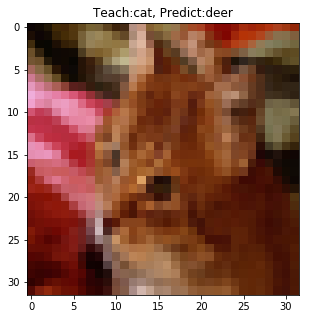

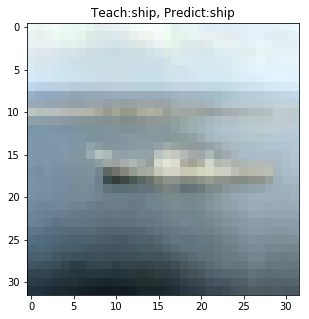

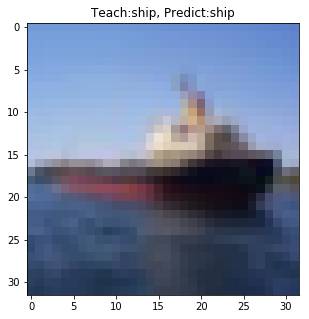

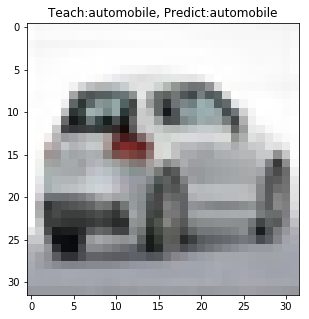

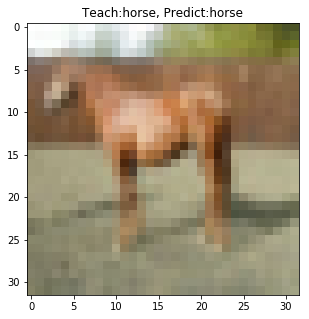

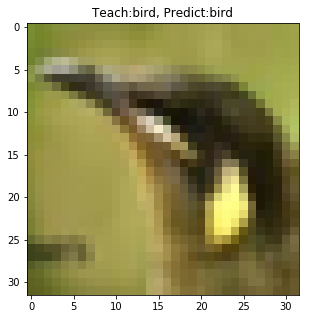

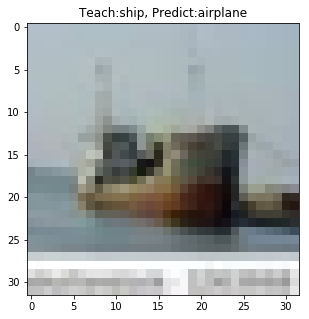

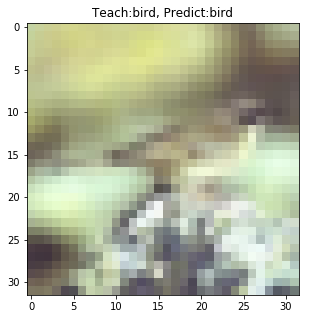

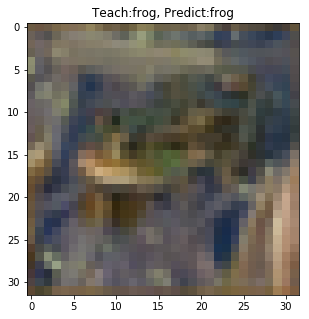

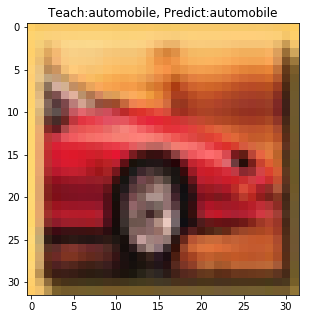

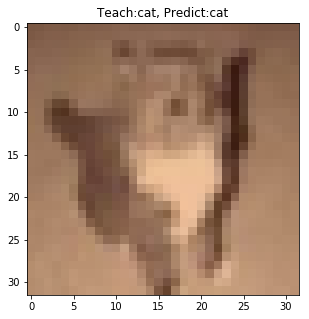

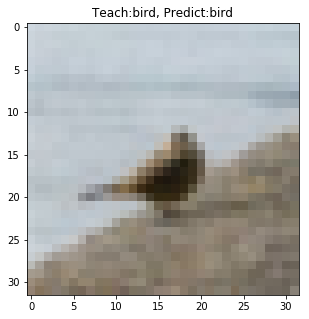

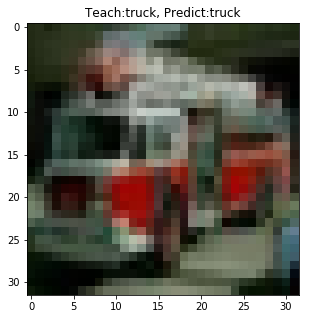

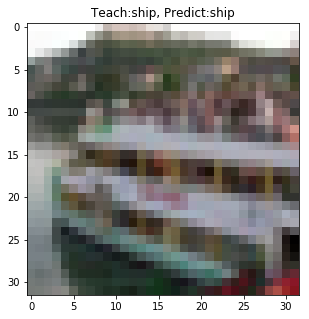

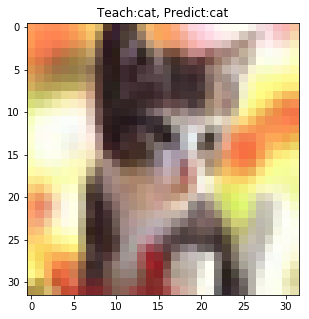

In [32]:
import matplotlib.pyplot as plt

for i in range(100):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)
    ax.set_title("Teach:{0}, Predict:{1}".format(labels[test_y[i].argmax()], labels[pred_y[i]]))
    ax.imshow(test_X[i])
    plt.show()